# BA - Customer Reviews Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BA_reviews.csv')
pd.set_option('display.max_colwidth', 00)

print(df.shape)
df.head()

(1000, 1)


,reviews
0,"✅ Trip Verified | The airplanes and the lounges are worn out, old and broken. From Dallas to Heathrow, multiple first class seating and electronics were non functional and poorly designed. The first class seating from Heathrow to Dubrovnik was nothing more than a tray blocking the middle seat of a standard coach ticket. Very disappointed."
1,"✅ Trip Verified | One of the worst experiences on the worst airline. The flight was delayed due to earlier technical issues. The time slipped from 17:00 to 20:00 to 22:00 and finally cancelled. There was zero information given. Despite paying well over the odds for business class, we were booted out of the BA lounge two hours before the flight. When it was finally cancelled, the BA staff. Without explanation, told everyone to go to a gate. After another hour or so they made us re enter the UK via passport control, a further 40 minute wait. By now the airport was closing and there was no sign of our bags or any help from BA. A passing Gatwick engineer finally helped us locate the bags. BA completely washed their hands of us and in contravention of CAA rules refused to find us accommodation. Many slept in a bus stop overnight. There were people with young children who couldn’t find somewhere to stay and yet BA had closed down and left. The following day the replacement flight was also late and due to an admin mistake had no catering or liquids for a 2 1/2 hr flight. Overall the service was shockingly bad, the worst I have experienced from any airline. I will not ever use them again."
2,"✅ Trip Verified | Cancelled our flight last-minute then moved us onto a flight 2 days later operated by Japan Airlines. We had paid a lot extra for extra legroom seats as I am very tall and they assigned me a middle seat deep in the middle of the plane. Because it was operated by a different airline but booked by BA, neither BA nor the other airline could change my seat over the phone despite seats being available. After 4 hours of waiting in queues and sitting on hold their solution was for me to arrive early at the airport. I did but the seats had already been given away for free by people who had booked directly with that airline and could check in online. I got a £10 meal voucher as compensation for this enormous downgrade on a 14 hour flight. Never again will I fly BA. I would rather fly indirect with better airlines than use this disgrace of an airline again."
3,"✅ Trip Verified | I had a flight from Miami, Florida to Dublin, Ireland, via London's Heathrow airport. The outbound flight from Miami was delayed and we were further delayed when our gate was occupied when we arrived in Heathrow. The total delay was roughly an hour, but it was enough to make our connection a challenge, where we had 73 minutes between original arrival time until the departure time to Dublin. When we headed to our connection flight, we were stopped by security personnel at a checkpoint and told us that the gate to our connection flight had already closed. This was twenty minutes prior to departure time. They ushered us to customer service to be rebooked. Given the busy weekend of travel, we were rebooked on a flight at a different airport and were told that our cost to get there would be reimbursed. We then waited 3 hours for our luggage, and then took a cab to London's City Airport. The cab fare was roughly $500. When I filed a claim with British Airways, they refused the claim and told me that we had plenty of time to make our connecting flight and therefore they denied my claim to be reimbursed for the cab fare. This is after I explained that it was British Airways employees who ushered us to rebook the flight despite the 20 minute timeframe to make the connecting flight. The person who rebooked us, told us it was policy that they close the gate 20 minutes prior to departure. I will never fly this awful airline again. Given the other feedback on this site, it appears that that is the overwhelming sentiment."
4,✅ 

## (A). TEXT CLEANING

We have a total of 1000 reviews. The text body of revies looks pretty clean aprt but a little cleaning is required. For example:
* Each review contains a "✅ Trip Verified |" Tag
* Punctuation marks. 
* Numbers in the text.

These will be unncecessary for the model. So, let's remove them.

In [3]:
# Remove "✅ Trip Verified |" Tag
df['reviews'] = df['reviews'].str.replace(r'^✅ Trip Verified \| ', '', regex=True)

# Remove Punctuation Marks
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Remove Numbers
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'\d', '', x))

In [4]:
df.head(2)

,reviews
0,The airplanes and the lounges are worn out old and broken From Dallas to Heathrow multiple first class seating and electronics were non functional and poorly designed The first class seating from Heathrow to Dubrovnik was nothing more than a tray blocking the middle seat of a standard coach ticket Very disappointed
1,One of the worst experiences on the worst airline The flight was delayed due to earlier technical issues The time slipped from to to and finally cancelled There was zero information given Despite paying well over the odds for business class we were booted out of the BA lounge two hours before the flight When it was finally cancelled the BA staff Without explanation told everyone to go to a gate After another hour or so they made us re enter the UK via passport control a further minute wait By now the airport was closing and there was no sign of our bags or any help from BA A passing Gatwick engineer finally helped us locate the bags BA completely washed their hands of us and in contravention of CAA rules refused to find us accommodation Many slept in a bus stop overnight There were people with young children who couldnt find somewhere to stay and yet BA had closed down and left The following day the replacement flight was also late and due to an admin mistake had no catering or liquids for a hr flight Overall the service was shockingly bad the worst I have experienced from any airline I will not ever use them again


## (B). TEXT PREPROCESSING

After cleaning the text. We will now preprocess the text.
* Convert all text to lower case
* Tokenize the text
* Remove stop words
* Lemmatize the words

Let's downlad the stopwords from NLTK and intialize the NLTK Lemmatizer. After that we will write a function to perform text preprocessing.

In [5]:
nltk.download('punkt')
nltk.download('omw-1.4')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
lemmatizer = WordNetLemmatizer()

In [7]:
def preprocess_text(text):
    
    # Converting text to lower case
    text = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove Stopwords
    words = [word for word in words if word not in stop_words]
    
    # Perform Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)

In [8]:
df['cleaned_reviews'] = df['reviews'].apply(lambda x: preprocess_text(x))

In [9]:
df.head(2)

,reviews,cleaned_reviews
0,The airplanes and the lounges are worn out old and broken From Dallas to Heathrow multiple first class seating and electronics were non functional and poorly designed The first class seating from Heathrow to Dubrovnik was nothing more than a tray blocking the middle seat of a standard coach ticket Very disappointed,airplane lounge worn old broken dallas heathrow multiple first class seating electronics non functional poorly designed first class seating heathrow dubrovnik nothing tray blocking middle seat standard coach ticket disappointed
1,One of the worst experiences on the worst airline The flight was delayed due to earlier technical issues The time slipped from to to and finally cancelled There was zero information given Despite paying well over the odds for business class we were booted out of the BA lounge two hours before the flight When it was finally cancelled the BA staff Without explanation told everyone to go to a gate After another hour or so they made us re enter the UK via passport control a further minute wait By now the airport was closing and there was no sign of our bags or any help from BA A passing Gatwick engineer finally helped us locate the bags BA completely washed their hands of us and in contravention of CAA rules refused to find us accommodation Many slept in a bus stop overnight There were people with young children who couldnt find somewhere to stay and yet BA had closed down and left The following day the replacement flight was also late and due to an admin mistake had no catering or liquids for a hr flight Overall the service was shockingly bad the worst I have experienced from any airline I will not ever use them again,one worst experience worst airline flight delayed due earlier technical issue time slipped finally cancelled zero information given despite paying well odds business class booted ba lounge two hour flight finally cancelled ba staff without explanation told everyone go gate another hour made u enter uk via passport control minute wait airport closing sign bag help ba passing gatwick engineer finally helped u locate bag ba completely washed hand u contravention caa rule refused find u accommodation many slept bus stop overnight people young child couldnt find somewhere stay yet ba closed left following day replacement flight also late due admin mistake catering liquid hr flight overall service shockingly bad worst experienced airline ever use


After text preprocessing the reviews look pretty clean. The size of each text has reduced significantly and only the words which provide maximum information, are there in the text. Let's use a few visualizations to check which words are used the most. before building a model, this will give us a neat idea about the direction we're moving in.

#### (A). Word Cloud

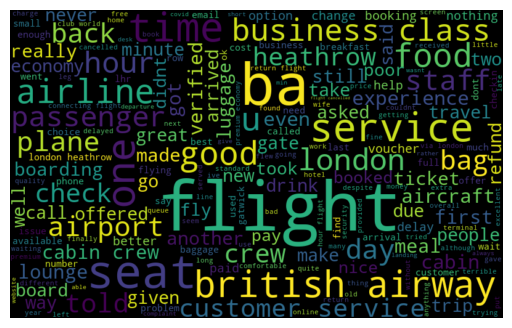

In [10]:
all_words = ' '.join([text for text in df['cleaned_reviews']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize = (10,4), dpi= 100)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#### (B). Line Plot

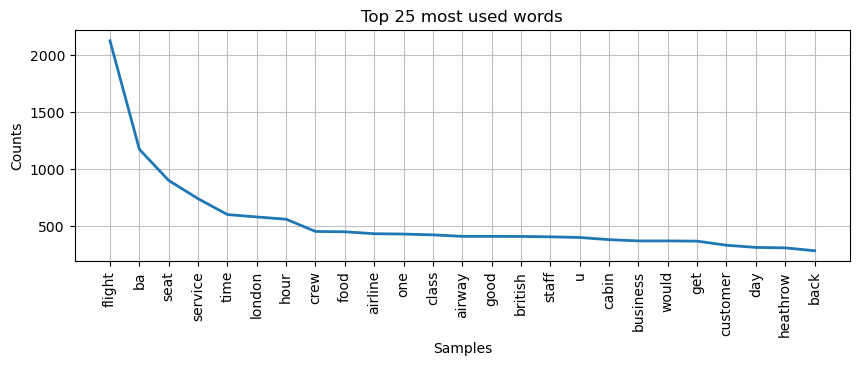

In [11]:
all_words = []

for line in list(df['cleaned_reviews']):
    words = line.split()
    for word in words:
        all_words.append(word)
        
plt.figure(figsize= (10,3), dpi= 100)
plt.title('Top 25 most used words')
plt.xticks(rotation= 90)
fd = nltk.FreqDist(all_words)
fd.plot(25, cumulative= False)
plt.show()

## (C). Sentiment Analysis

* First we'll classify the reviews using **key-words** ('horrible', 'never', 'worse', 'worst', 'annoyed', 'trouble', 'disappointed', 'cancelled', 'Cancelled', 'awful', 'issues', 'disgusting'). If the text of the review contains those negative words, the review will be marked 1 otherwise 0.

* Then we'll extract **Word2Vec** embeddings from the cleaned reviews and use a KMeans cluster to segment the reviews in 2 clusters. We'll look at the interpretation of the clusters.

* Then we'll use **VADER** to classify the reviews into 'Positive', 'Negative' and 'Neutral' categories based on polarity-score

### 1. Key-Words

In [12]:
# Store the keywords in a list
keywords = ['horrible', 'never', 'worse', 'worst', 'annoyed', 'trouble', 'disappointed', 'cancelled', 'Cancelled', 'awful', 'issues', 'disgusting']

# Create a function to check if a review contains any of the keywords
def classify_review(review):
    for keyword in keywords:
        if keyword in review:
            return 1
    return 0

# Apply the function to the DataFrame and create the 'label' column
df['label'] = df['reviews'].apply(classify_review)

### 2. KMean Clustering

In [13]:
# Create tokens out of the review text
tokenized_reviews = [word_tokenize(review) for review in df['cleaned_reviews']]

In [14]:
# Training Word2Vec Model
model = Word2Vec(sentences= tokenized_reviews, vector_size=100, window=5, min_count=1, sg=0)

To perform K-Means clustering, we need to convert each review into a document vector. We'll generate Document Vectors:

In [15]:
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model.wv:
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

In [16]:
df['vector'] = df['cleaned_reviews'].apply(lambda x: average_word_vectors(x, model, 100))

Now we'll use KMeans to generate clusters.

In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(list(df['vector']))

df['cluster'] = kmeans.labels_

### 3. VADER (Sentiment Intensity Analyzer)

In [18]:
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Let's define a function to generate classes based on the polarity_score

In [19]:
def find_sentiment(text):
    
    sentiment_score= analyzer.polarity_scores(text)
    
    if sentiment_score['compound'] >= 0.5:
        return 'positive'
    elif sentiment_score['compound'] <= -0.5:
        return 'negative'
    else:
        return 'neutral'

In [20]:
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: find_sentiment(x))

In [21]:
df.drop(columns= 'vector', axis=1, inplace= True)
df.head()

,reviews,cleaned_reviews,label,cluster,sentiment
0,The airplanes and the lounges are worn out old and broken From Dallas to Heathrow multiple first class seating and electronics were non functional and poorly designed The first class seating from Heathrow to Dubrovnik was nothing more than a tray blocking the middle seat of a standard coach ticket Very disappointed,airplane lounge worn old broken dallas heathrow multiple first class seating electronics non functional poorly designed first class seating heathrow dubrovnik nothing tray blocking middle seat standard coach ticket disappointed,1,1,negative
1,One of the worst experiences on the worst airline The flight was delayed due to earlier technical issues The time slipped from to to and finally cancelled There was zero information given Despite paying well over the odds for business class we were booted out of the BA lounge two hours before the flight When it was finally cancelled the BA staff Without explanation told everyone to go to a gate After another hour or so they made us re enter the UK via passport control a further minute wait By now the airport was closing and there was no sign of our bags or any help from BA A passing Gatwick engineer finally helped us locate the bags BA completely washed their hands of us and in contravention of CAA rules refused to find us accommodation Many slept in a bus stop overnight There were people with young children who couldnt find somewhere to stay and yet BA had closed down and left The following day the replacement flight was also late and due to an admin mistake had no catering or liquids for a hr flight Overall the service was shockingly bad the worst I have experienced from any airline I will not ever use them again,one worst experience worst airline flight delayed due earlier technical issue time slipped finally cancelled zero information given despite paying well odds business class booted ba lounge two hour flight finally cancelled ba staff without explanation told everyone go gate another hour made u enter uk via passport control minute wait airport closing sign bag help ba passing gatwick engineer finally helped u locate bag ba completely washed hand u contravention caa rule refused find u accommodation many slept bus stop overnight people young child couldnt find somewhere stay yet ba closed left following day replacement flight also late due admin mistake catering liquid hr flight overall service shockingly bad worst experienced airline ever use,1,0,negative
2,Cancelled our flight lastminute then moved us onto a flight days later operated by Japan Airlines We had paid a lot extra for extra legroom seats as I am very tall and they assigned me a middle seat deep in the middle of the plane Because it was operated by a different airline but booked by BA neither BA nor the other airline could change my seat over the phone despite seats being available After hours of waiting in queues and sitting on hold their solution was for me to arrive early at the airport I did but the seats had already been given away for free by people who had booked directly with that airline and could check in online I got a meal voucher as compensation for this enormous downgrade on a hour flight Never again will I fly BA I would rather fly indirect with better airlines than use this disgrace of an airline again,cancelled flight lastminute moved u onto flight day later operated japan airline paid lot extra extra legroom seat tall assigned middle seat deep middle plane operated different airline booked ba neither ba airline could change seat phone despite seat available hour waiting queue sitting hold solution arrive early airport seat already given away free people booked directly airline could check online got meal voucher compensation enormous downgrade hour flight never fly ba would rather fly indirect better airline use disgrace airline,1,1,positive
3,I had a flight from Miami Florida to Dublin Ireland via Londons Heathrow airport The outbound fli

## (D). CONCLUSION

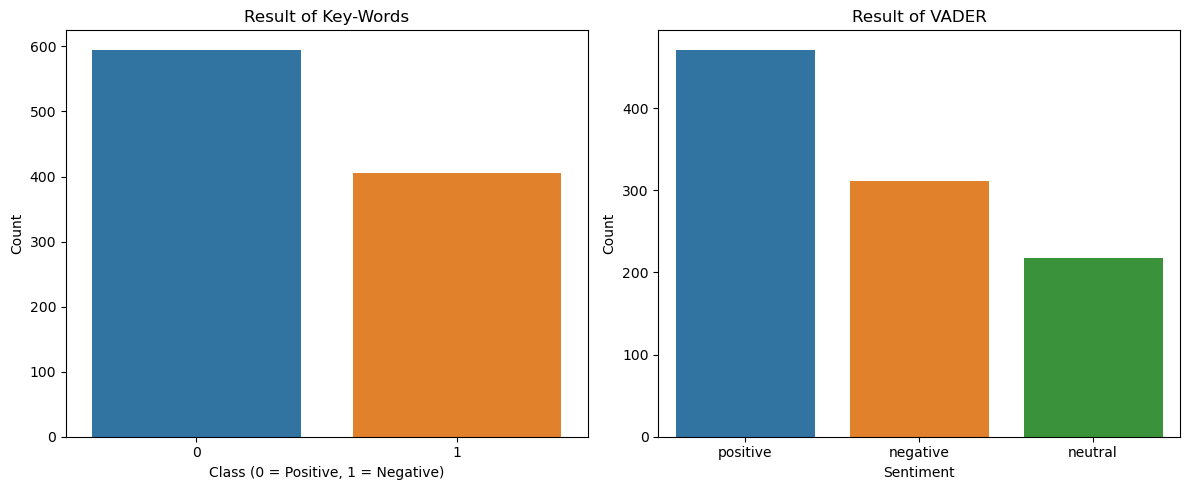

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first bar plot (Keywords)
sns.barplot(x= df['label'].value_counts().index, y= df['label'].value_counts().values, data=df, ax=axes[0])
axes[0].set_title('Result of Key-Words')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Class (0 = Positive, 1 = Negative)')

# Plot the second bar plot (Vader)
sns.barplot(x= df['sentiment'].value_counts().index, y= df['sentiment'].value_counts().values, data=df, ax=axes[1])
axes[1].set_title('Result of VADER')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Sentiment')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

Let's check the predominent words in each category of the reviews

In [25]:
df['sentiment'].value_counts()/df.shape[0]

positive    0.471
negative    0.311
neutral     0.218
Name: sentiment, dtype: float64